In [2]:
%matplotlib inline

In [3]:
from galsize_models.models import load_moster13_mock
mock = load_moster13_mock()


In [4]:
from galsize_models.models import kravtsov13

mock['galaxy_rhalf'] = kravtsov13(mock['halo_mpeak'], scatter_in_dex=0.2)

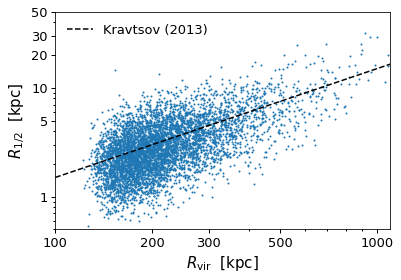

In [5]:
from galsize_models.models import galsize_vs_rvir
from halotools.empirical_models import halo_mass_to_halo_radius
from astropy.cosmology import Planck15 

mass=mock['halo_mpeak']
cosmology=Planck15
redshift=0
mdef='200c'

r200c_in_Mpc = halo_mass_to_halo_radius(mass, cosmology, redshift, mdef)/Planck15.h


import matplotlib.ticker

fig, ax = plt.subplots(1, 1)

ax.loglog()

__=ax.scatter(1000*r200c_in_Mpc[::50], mock['galaxy_rhalf'][::50].data, s=1)

abscissa = np.logspace(2, 3.5, 50)
ordinates = galsize_vs_rvir(abscissa, scatter_in_dex=0.)
__=ax.plot(abscissa, ordinates, '--', color='k', label='Kravtsov (2013)')

xlim = ax.set_xlim(100, 1100)
ax.set_xticks((100, 200, 300, 500, 1000))
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())

ylim = ax.set_ylim(0.5, 50)
ax.set_yticks((1, 5, 10, 20, 30, 50))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())

xlabel = ax.set_xlabel(r'$R_{\rm vir}$  [kpc]')
ylabel = ax.set_ylabel(r'$R_{\rm 1/2}$  [kpc]')
legend = ax.legend()

In [6]:
from galsize_models.models import mstar_size_masks

_result = mstar_size_masks(mock['mstar'], mock['galaxy_rhalf'], 10., 10.5)
mask1_all, mask1_low_size, mask1_high_size = _result

_result = mstar_size_masks(mock['mstar'], mock['galaxy_rhalf'], 10.5, 11)
mask2_all, mask2_low_size, mask2_high_size = _result

_result = mstar_size_masks(mock['mstar'], mock['galaxy_rhalf'], 11, 11.5)
mask3_all, mask3_low_size, mask3_high_size = _result

In [8]:
from galsize_models.models import wp_measurement_iterator

masks = list((mask1_all, mask1_low_size, mask1_high_size, 
             mask2_all, mask2_low_size, mask2_high_size, 
             mask3_all, mask3_low_size, mask3_high_size))

rp_bins = np.logspace(-1, 1.25, 30)
pi_max = 20.
wp_result_tuples = list(wp_measurement_iterator(mock, *masks, 
                                          period=250, rp_bins=rp_bins, pi_max=pi_max))

rp_mids = 0.5*(wp_result_tuples[0][0][:-1] + wp_result_tuples[0][0][1:])
wp_list = [wp_result[1] for wp_result in wp_result_tuples]

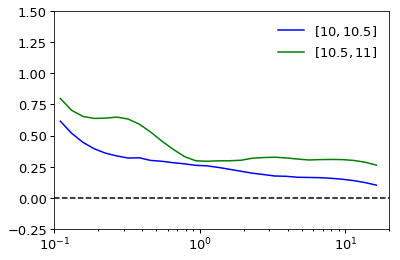

In [12]:
from scipy.signal import savgol_filter

fig, ax = plt.subplots(1, 1)

xscale = ax.set_xscale('log')

fracdiff1 = (wp_list[2]-wp_list[1])/wp_list[0]
fracdiff2 = (wp_list[5]-wp_list[4])/wp_list[3]
fracdiff3 = (wp_list[8]-wp_list[7])/wp_list[6]

fracdiff1_smooth = savgol_filter(fracdiff1, 11, 3)
fracdiff2_smooth = savgol_filter(fracdiff2, 11, 3)
fracdiff3_smooth = savgol_filter(fracdiff3, 11, 3)

__=ax.plot(rp_mids, fracdiff1_smooth, color='blue', label=r'$[10, 10.5]$')
__=ax.plot(rp_mids, fracdiff2_smooth, color='green', label=r'$[10.5, 11]$')
__=ax.plot(rp_mids, fracdiff3_smooth, color='red', label=r'$[11, 11.5]$')
__=ax.plot(np.logspace(-1, 2, 100), np.zeros(100), '--', color='k')

xlim = ax.set_xlim(0.1, 20)
ylim = ax.set_ylim(-0.25, 1.5)

legend = ax.legend()